In [1]:
from model.prsnet.lightning_prsnet import LightingPRSNet
import matplotlib.pyplot as plt
import os
import pandas as pd

In [3]:
def plot_metric(version, path_to_metric_file, ax, x, y):
    if not os.path.exists(path_to_metric_file):
        return
    
    data = pd.read_csv(path_to_metric_file)
    if not y in data.columns:
        return
    data = data[[x, y]].dropna()
    data = data.rename(columns={y : str(y) +"_"+ str(version)})
    data.plot(ax = ax, kind="line", x=x, y=str(y) +"_"+ str(version))

In [4]:
def plot_results(folder_root):
    versiones = os.listdir(folder_root)
    fig, axes = plt.subplots(4, figsize=(10,10))
    axes = axes.flatten()
    ys = ["train_phc", "val_phc", "train_loss", "val_loss"]
    xs = ["epoch"]
    for j, y in enumerate(ys):
        for i, version in enumerate(versiones):
            vpath = os.path.join(
                folder_root,
                version,
                "metrics.csv"
            )
            plot_metric(version, vpath, axes[j], xs[0], y)
  

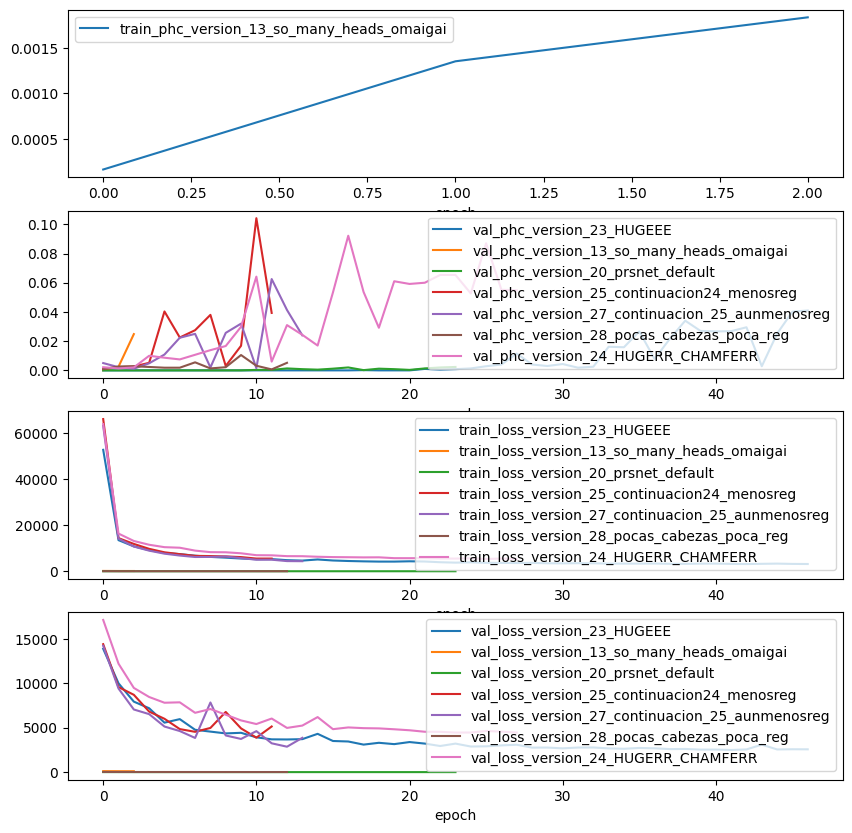

In [5]:
plot_results("modelos_interesantes")